# Decision Tree Classifier

## Expectations

Hypothesis: DTs will classify the wine dataset with high ...

Experiment: Train a DT classifier on the wine dataset and evaluate its performance using cross-validation

Analysis: 

Conclusion:

Justification (scrutenize everything like data, model params, etc)
- hyperparameter tuning (methods for hyperparameter tuning such as Grid Search, Random Search, and Bayesian Search)



In [36]:
%pip install --upgrade pip
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
%matplotlib inline

## Data loading and preparation

In [50]:
# fetch datasets and split train, validation and test sets
wine = fetch_ucirepo(id=109)

X_wine = wine.data.features
y_wine = wine.data.targets

print(f"X_wine shape: {X_wine.shape}")
print(f"y_wine shape: {y_wine.shape}")
print(y_wine.sample(5))
X_wine.sample(5)

X_wine shape: (178, 13)
y_wine shape: (178, 1)
     class
66       2
57       1
165      3
118      2
156      3


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.8,0.84,2.01,515
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.1,0.96,3.36,845
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.3,1.27,2.96,710
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.9,0.58,1.33,415
15,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.3,1.28,2.88,1310


In [53]:
# split into train, validation and test sets (use train_test_split twice)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine,
    y_wine,
    test_size=0.2,  # split data into 80% training and 20% testing
    random_state=48,  # for reproducibility
    shuffle=True,
)

X_wine_train, X_wine_validation, y_wine_train, y_wine_validation = train_test_split(
    X_wine_train,
    y_wine_train,
    test_size=0.2,  # split training into 80% training and 20% validation
    random_state=48,  # for reproducibility
    shuffle=True,
)
# show the shape of the train, validation and test sets
print(f"X_wine_train shape: {X_wine_train.shape}")
print(f"y_wine_train shape: {y_wine_train.shape}")
print(f"X_wine_validation shape: {X_wine_validation.shape}")
print(f"y_wine_validation shape: {y_wine_validation.shape}")
print(f"X_wine_test shape: {X_wine_test.shape}")
print(f"y_wine_test shape: {y_wine_test.shape}")

X_wine_train shape: (113, 13)
y_wine_train shape: (113, 1)
X_wine_validation shape: (29, 13)
y_wine_validation shape: (29, 1)
X_wine_test shape: (36, 13)
y_wine_test shape: (36, 1)


In [ ]:
# abalone = fetch_ucirepo(id=1)
# X_abalone = abalone.data
# y_abalone = abalone.target
# print(f"X_abalone shape: {X_abalone.shape}")
# print(f"y_abalone shape: {y_abalone.shape}")

## Train a Decision Tree Classifier

In [15]:
# DTs are sensitive to class imbalance (ie. decrease # instances of majority classes) - `class_weight` parameter to ensure DT classifier doesn't favor majority class

clf = tree.DecisionTreeClassifier(
    # criterion='entropy', # split based on information gain
    # random_state=48, # to ensure reproducibility (otherwise scikit-learn will use random seed and the tree might be different each time)
    # class_weight='balanced' # to account for class imbalance
    # max_depth=3 # to prevent overfitting
)
clf = clf.fit(X_wine, y_wine)
# print accuracy of DT without hyperparameter tuning is X

### Validation

Plot training & cross-validation accuracy as a function of `max_depth` (more depth = overfitting)

In [33]:
export_graphviz(
    clf,
    out_file="wine_tree.dot",
    feature_names=X_wine.columns,
    class_names=y_wine["class"].astype("str").unique(),
    rounded=True,
    filled=True,
)
# OR
# tree.plot_tree(
#     clf,
#     filled=True, # fill nodes with colors
#     rounded=True, # round the corners of the nodes
# )

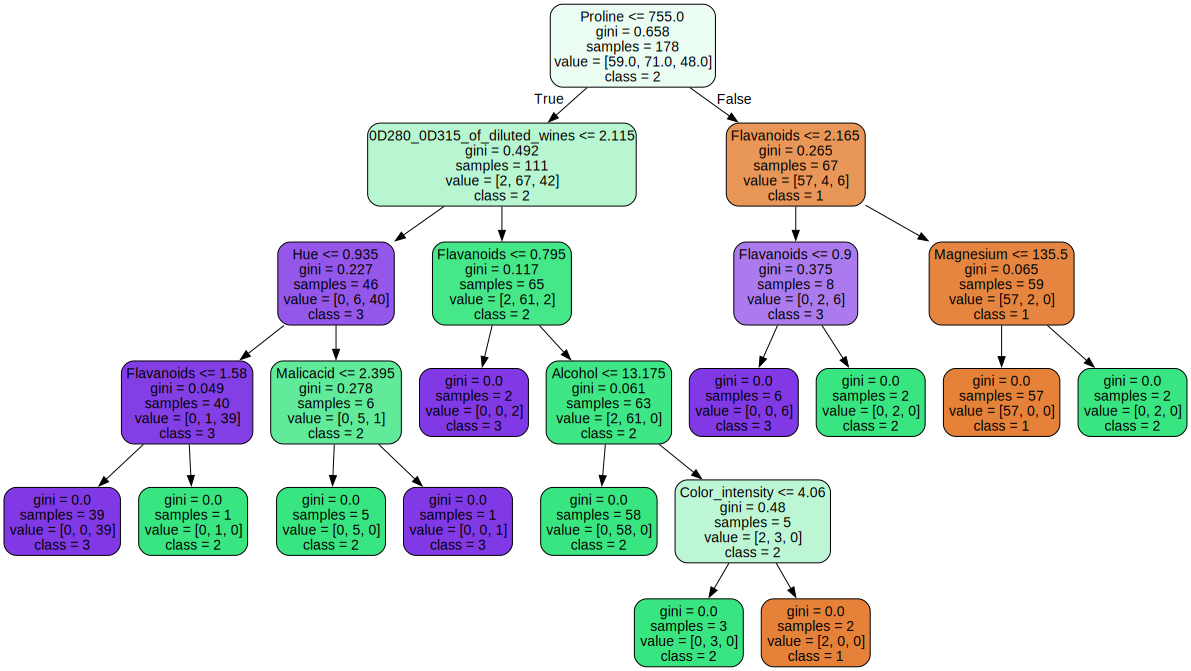

In [38]:
Source.from_file("wine_tree.dot")

In [48]:
# visualize the decision boundary for two features
disp = DecisionBoundaryDisplay().from_estimator(
    clf,  # classifier
    X_wine,  # features
    alpha=0.5,
    response_method="predict",
    xlabel="Feature 1",
    ylabel="Feature 2",
    fill_alpha=0.4,
    scatter_kwargs={"s": 10},
)
disp.ax_.set_title("Decision Boundary of Decision Tree Classifier")
disp.ax_.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, s=20, edgecolor="k", lw=0.5)
plt.show()

TypeError: DecisionBoundaryDisplay.__init__() missing 3 required keyword-only arguments: 'xx0', 'xx1', and 'response'

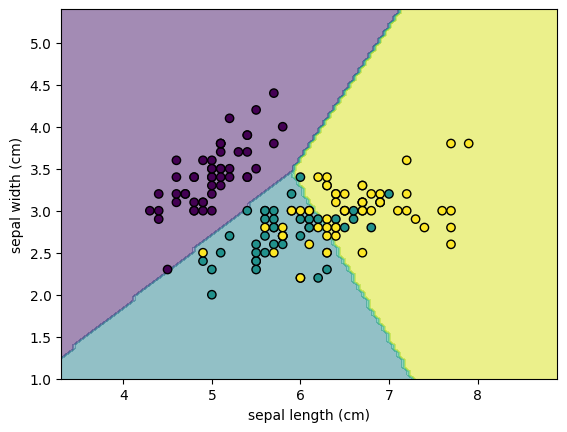

In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

In [ ]:
# confusion matrix (counts the number of times instances of class A are classified as class B, for all A/B pairs)

# to compute the confusion matrix, we need to have a set of predictions (so they can be compared to the actual targets)
# don't use the test set - instead try and save that for the final evaluation

# use cross_val_predict (returns predictions made on each test fold)
# evaluate the model using k-fold cross-validation (randomly splits the training set into k non-overlapping subsets/folds then it trains and evaluates the decition tree k times picking a different fold for evaluation each time and training on the other k-1 folds)
cross_val_score(
    clf,  # classifier
    X_wine,  # features
    y_wine,  # labels
    scoring="accuracy",  # metric to evaluate the model
    cv=5,  # 5-fold cross-validation
)

In [ ]:
# each row in the cm represents an actual class, while each column represents a predicted class
confusion_matrix(y_wine_test, clf.predict(X_wine_test))

In [ ]:
# since its prone to overfitting do I need to split into training, validation and test set?

In [ ]:
# run CART (with gini and/or entropy) on the dataset (adjust regularization using max_depth)

In [ ]:
# run ID3 with pruning on the dataset

In [ ]:
# plot decision tree boundaries

In [ ]:
# estimate probability that an instance belongs to a class

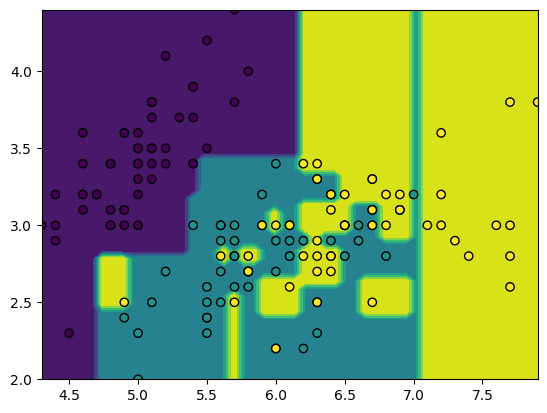

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
feature_1, feature_2 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max()),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max()),
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = DecisionTreeClassifier().fit(iris.data[:, :2], iris.target)
y_pred = np.reshape(tree.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
display.plot()
display.ax_.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black")
plt.show()